<a href="https://colab.research.google.com/github/ikwabia/LEGO-SETS/blob/main/Lego_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px


In [4]:
df = pd.read_excel('/DiB small sample Dec 2015 - Apr 2019 prices.xlsx')


In [23]:
df

,id,Theme,#,# of Pieces,Year of release,Name,Retail price at release ($),2015-12-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,...,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00
0,1,Architecture,21005-1,811.0,2009,Fallingwater,99.99,177.82,185.60,194.30,...,220.27,211.20,241.87,227.73,234.20,279.79,280.00,260.40,257.40,240.60
1,2,Architecture,21000-1,69.0,2008,Sears Tower,19.99,44.93,44.93,50.47,...,86.60,86.60,86.60,86.60,86.60,86.60,86.60,86.60,86.60,86.60
2,3,Architecture,21001-1,69.0,2008,John Hancock Center,19.99,165.67,179.53,186.13,...,160.87,162.80,169.87,170.40,165.93,165.47,165.47,165.47,178.67,178.67
3,4,Architecture,21002-1,77.0,2009,Empire State Building,19.99,36.11,33.32,34.65,...,44.41,44.87,41.00,39.73,40.80,46.94,47.20,48.53,52.07,51.47
4,5,Architecture,21003-1,57.0,2009,Seattle Space Needle,19.99,22.41,21.50,20.39,...,53.13,50.00,38.80,44.40,57.86,60.47,61.20,54.19,70.33,62.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,219,Star Wars,10174-1,1068.0,2006,Imperial AT-ST,79.99,381.17,412.60,409.20,...,337.53,321.87,281.40,275.87,254.67,260.73,267.40,246.33,273.67,292.67
219,220,Star Wars,4483-1,1068.0,2003,AT-AT,99.99,274.67,308.60,320.27,...,248.53,241.53,230.40,222.87,171.60,164.93,199.53,199.87,219.00,219.00
220,221,Star Wars,7676-1,1034.0,2008,Republic Attack Gunship,119.99,187.87,199.13,210.73,...,192.67,189.13,161.33,163.00,148.93,172.93,197.80,217.13,217.40,207.40
221,222,Star Wars,7964-1,1015.0,2011,Republic Frigate,119.99,163.94,176.88,169.53,...,209.73,203.27,190.60,187.47,186.80,205.13,205.13,213.53,208.53,196.87


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           223 non-null    int64  
 1   Theme                        223 non-null    object 
 2   #                            223 non-null    object 
 3   # of Pieces                  222 non-null    float64
 4   Year of release              223 non-null    int64  
 5   Name                         223 non-null    object 
 6   Retail price at release ($)  223 non-null    object 
 7   2015-12-01 00:00:00          211 non-null    float64
 8   2016-01-01 00:00:00          213 non-null    float64
 9   2016-02-01 00:00:00          214 non-null    float64
 10  2016-03-01 00:00:00          216 non-null    float64
 11  2016-04-01 00:00:00          218 non-null    float64
 12  2016-05-01 00:00:00          219 non-null    float64
 13  2016-06-01 00:00:00 

In [7]:
df.isna().sum()

id                              0
Theme                           0
#                               0
# of Pieces                     1
Year of release                 0
Name                            0
Retail price at release ($)     0
2015-12-01 00:00:00            12
2016-01-01 00:00:00            10
2016-02-01 00:00:00             9
2016-03-01 00:00:00             7
2016-04-01 00:00:00             5
2016-05-01 00:00:00             4
2016-06-01 00:00:00             3
2016-07-01 00:00:00             2
2016-08-01 00:00:00             1
2016-09-01 00:00:00             1
2016-10-01 00:00:00             1
2016-11-01 00:00:00             0
2016-12-01 00:00:00             4
2017-01-01 00:00:00             4
2017-02-01 00:00:00             3
2017-03-01 00:00:00             3
2017-04-01 00:00:00             3
2017-05-01 00:00:00             3
2017-06-01 00:00:00             3
2017-07-01 00:00:00             3
2017-08-01 00:00:00             3
2017-09-01 00:00:00             3
2017-10-01 00:

In [30]:
df.dropna()


,id,Theme,#,# of Pieces,Year of release,Name,Retail price at release ($),2015-12-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,...,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00
0,1,Architecture,21005-1,811.0,2009,Fallingwater,99.99,177.82,185.60,194.30,...,220.27,211.20,241.87,227.73,234.20,279.79,280.00,260.40,257.40,240.60
1,2,Architecture,21000-1,69.0,2008,Sears Tower,19.99,44.93,44.93,50.47,...,86.60,86.60,86.60,86.60,86.60,86.60,86.60,86.60,86.60,86.60
2,3,Architecture,21001-1,69.0,2008,John Hancock Center,19.99,165.67,179.53,186.13,...,160.87,162.80,169.87,170.40,165.93,165.47,165.47,165.47,178.67,178.67
3,4,Architecture,21002-1,77.0,2009,Empire State Building,19.99,36.11,33.32,34.65,...,44.41,44.87,41.00,39.73,40.80,46.94,47.20,48.53,52.07,51.47
4,5,Architecture,21003-1,57.0,2009,Seattle Space Needle,19.99,22.41,21.50,20.39,...,53.13,50.00,38.80,44.40,57.86,60.47,61.20,54.19,70.33,62.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,219,Star Wars,10174-1,1068.0,2006,Imperial AT-ST,79.99,381.17,412.60,409.20,...,337.53,321.87,281.40,275.87,254.67,260.73,267.40,246.33,273.67,292.67
219,220,Star Wars,4483-1,1068.0,2003,AT-AT,99.99,274.67,308.60,320.27,...,248.53,241.53,230.40,222.87,171.60,164.93,199.53,199.87,219.00,219.00
220,221,Star Wars,7676-1,1034.0,2008,Republic Attack Gunship,119.99,187.87,199.13,210.73,...,192.67,189.13,161.33,163.00,148.93,172.93,197.80,217.13,217.40,207.40
221,222,Star Wars,7964-1,1015.0,2011,Republic Frigate,119.99,163.94,176.88,169.53,...,209.73,203.27,190.60,187.47,186.80,205.13,205.13,213.53,208.53,196.87


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           223 non-null    int64  
 1   Theme                        223 non-null    object 
 2   #                            223 non-null    object 
 3   # of Pieces                  222 non-null    float64
 4   Year of release              223 non-null    int64  
 5   Name                         223 non-null    object 
 6   Retail price at release ($)  223 non-null    object 
 7   2015-12-01 00:00:00          211 non-null    float64
 8   2016-01-01 00:00:00          213 non-null    float64
 9   2016-02-01 00:00:00          214 non-null    float64
 10  2016-03-01 00:00:00          216 non-null    float64
 11  2016-04-01 00:00:00          218 non-null    float64
 12  2016-05-01 00:00:00          219 non-null    float64
 13  2016-06-01 00:00:00 

In [32]:
df

,id,Theme,#,# of Pieces,Year of release,Name,Retail price at release ($),2015-12-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,...,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00
0,1,Architecture,21005-1,811.0,2009,Fallingwater,99.99,177.82,185.60,194.30,...,220.27,211.20,241.87,227.73,234.20,279.79,280.00,260.40,257.40,240.60
1,2,Architecture,21000-1,69.0,2008,Sears Tower,19.99,44.93,44.93,50.47,...,86.60,86.60,86.60,86.60,86.60,86.60,86.60,86.60,86.60,86.60
2,3,Architecture,21001-1,69.0,2008,John Hancock Center,19.99,165.67,179.53,186.13,...,160.87,162.80,169.87,170.40,165.93,165.47,165.47,165.47,178.67,178.67
3,4,Architecture,21002-1,77.0,2009,Empire State Building,19.99,36.11,33.32,34.65,...,44.41,44.87,41.00,39.73,40.80,46.94,47.20,48.53,52.07,51.47
4,5,Architecture,21003-1,57.0,2009,Seattle Space Needle,19.99,22.41,21.50,20.39,...,53.13,50.00,38.80,44.40,57.86,60.47,61.20,54.19,70.33,62.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,219,Star Wars,10174-1,1068.0,2006,Imperial AT-ST,79.99,381.17,412.60,409.20,...,337.53,321.87,281.40,275.87,254.67,260.73,267.40,246.33,273.67,292.67
219,220,Star Wars,4483-1,1068.0,2003,AT-AT,99.99,274.67,308.60,320.27,...,248.53,241.53,230.40,222.87,171.60,164.93,199.53,199.87,219.00,219.00
220,221,Star Wars,7676-1,1034.0,2008,Republic Attack Gunship,119.99,187.87,199.13,210.73,...,192.67,189.13,161.33,163.00,148.93,172.93,197.80,217.13,217.40,207.40
221,222,Star Wars,7964-1,1015.0,2011,Republic Frigate,119.99,163.94,176.88,169.53,...,209.73,203.27,190.60,187.47,186.80,205.13,205.13,213.53,208.53,196.87


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           223 non-null    int64  
 1   Theme                        223 non-null    object 
 2   #                            223 non-null    object 
 3   # of Pieces                  222 non-null    float64
 4   Year of release              223 non-null    int64  
 5   Name                         223 non-null    object 
 6   Retail price at release ($)  223 non-null    object 
 7   2015-12-01 00:00:00          211 non-null    float64
 8   2016-01-01 00:00:00          213 non-null    float64
 9   2016-02-01 00:00:00          214 non-null    float64
 10  2016-03-01 00:00:00          216 non-null    float64
 11  2016-04-01 00:00:00          218 non-null    float64
 12  2016-05-01 00:00:00          219 non-null    float64
 13  2016-06-01 00:00:00 

In [35]:
df.rename(columns={'#': 'Sr #'})


,id,Theme,Sr #,# of Pieces,Year of release,Name,Retail price at release ($),2015-12-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,...,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00
0,1,Architecture,21005-1,811.0,2009,Fallingwater,99.99,177.82,185.60,194.30,...,220.27,211.20,241.87,227.73,234.20,279.79,280.00,260.40,257.40,240.60
1,2,Architecture,21000-1,69.0,2008,Sears Tower,19.99,44.93,44.93,50.47,...,86.60,86.60,86.60,86.60,86.60,86.60,86.60,86.60,86.60,86.60
2,3,Architecture,21001-1,69.0,2008,John Hancock Center,19.99,165.67,179.53,186.13,...,160.87,162.80,169.87,170.40,165.93,165.47,165.47,165.47,178.67,178.67
3,4,Architecture,21002-1,77.0,2009,Empire State Building,19.99,36.11,33.32,34.65,...,44.41,44.87,41.00,39.73,40.80,46.94,47.20,48.53,52.07,51.47
4,5,Architecture,21003-1,57.0,2009,Seattle Space Needle,19.99,22.41,21.50,20.39,...,53.13,50.00,38.80,44.40,57.86,60.47,61.20,54.19,70.33,62.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,219,Star Wars,10174-1,1068.0,2006,Imperial AT-ST,79.99,381.17,412.60,409.20,...,337.53,321.87,281.40,275.87,254.67,260.73,267.40,246.33,273.67,292.67
219,220,Star Wars,4483-1,1068.0,2003,AT-AT,99.99,274.67,308.60,320.27,...,248.53,241.53,230.40,222.87,171.60,164.93,199.53,199.87,219.00,219.00
220,221,Star Wars,7676-1,1034.0,2008,Republic Attack Gunship,119.99,187.87,199.13,210.73,...,192.67,189.13,161.33,163.00,148.93,172.93,197.80,217.13,217.40,207.40
221,222,Star Wars,7964-1,1015.0,2011,Republic Frigate,119.99,163.94,176.88,169.53,...,209.73,203.27,190.60,187.47,186.80,205.13,205.13,213.53,208.53,196.87


In [36]:
theme_data = df.groupby('Theme')['# of Pieces'].sum()

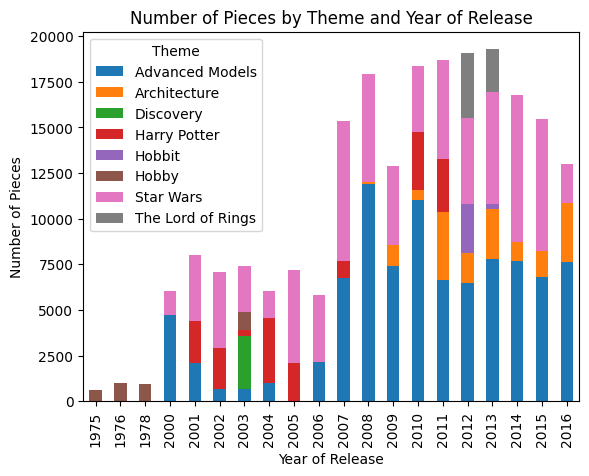

In [37]:
# Group the data by theme and year of release and sum the number of pieces
theme_data = df.groupby(['Theme', 'Year of release'])['# of Pieces'].sum()

# Reshape the data into a pivot table
theme_data = theme_data.unstack(level=0)

# Create a stacked bar chart
theme_data.plot(kind='bar', stacked=True)
plt.xlabel('Year of Release')
plt.ylabel('Number of Pieces')
plt.title('Number of Pieces by Theme and Year of Release')
plt.show()

In [47]:
df['Retail price at release ($)'] = pd.to_numeric(df['Retail price at release ($)'], errors='coerce')
df = df.dropna(subset=['Retail price at release ($)'])

df['Retail price at release ($)'] = df['Retail price at release ($)'].astype(float)


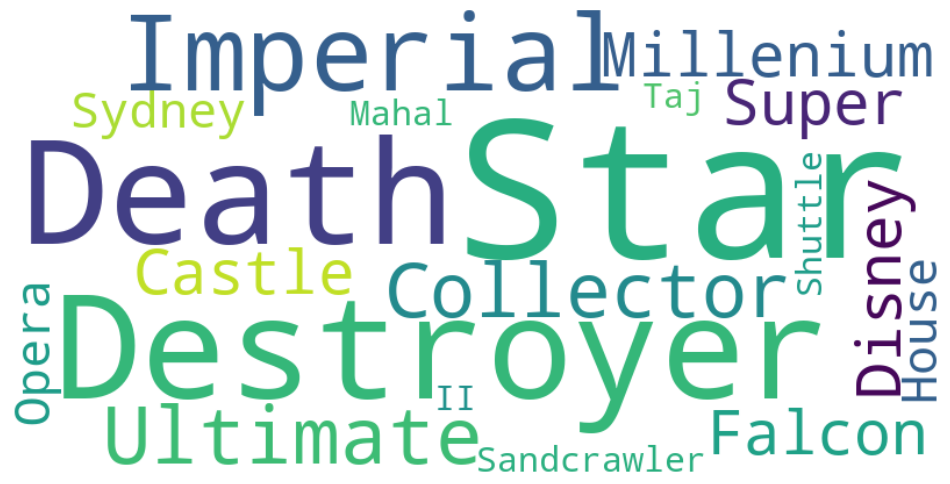

In [46]:
#Top 10 Expensive Sets
# Sort the data by secondary market prices in descending order

df_sorted = df.sort_values(by ='Retail price at release ($)', ascending=False)

# Get the names of the top 10 most expensive sets
top_names = df_sorted.head(10)['Name']

# Combine the names of the top 10 most expensive sets into a single string
text = ' '.join(top_names)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

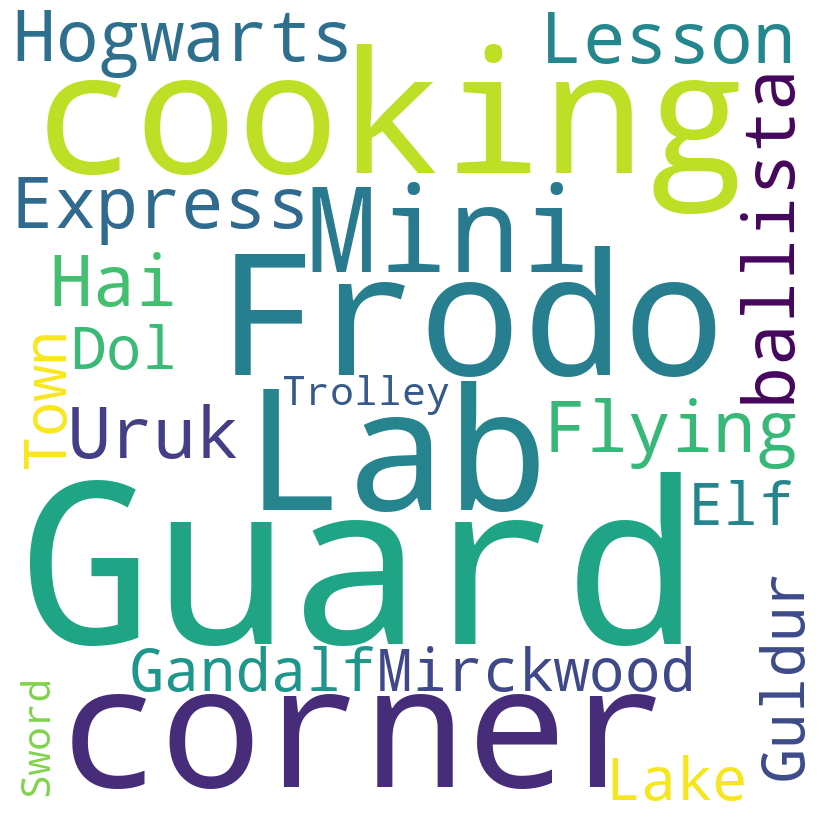

In [48]:
#Top 10 Cheapest Sets
df['Retail price at release ($)'] = df['Retail price at release ($)'].astype(float)

df = df.sort_values(by=['Retail price at release ($)'])
df = df.head(10)


# Generate the word cloud
text = ' '.join(df['Name'])
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [49]:
import plotly.graph_objects as go
df_year = pd.DataFrame(df.groupby('Year of release')['Name'].agg(['count', lambda x: ', '.join(x)])).reset_index()
df_year.columns = ['Year of release', 'count', 'Name']

# Define the color scale
color_scale = 'RdYlGn_r'

fig = go.Figure([go.Bar(x=df_year['Year of release'], y=df_year['count'], hovertext=df_year['Name'], hoverinfo='text', marker=dict(color=df_year['count'], coloraxis="coloraxis"))])
fig.update_layout(title='Number of Sets Released per Year', xaxis_title='Year', yaxis_title='Number of Sets', coloraxis=dict(colorscale=color_scale))
fig.show()

In [50]:
df.columns

Index([                         'id',                       'Theme',
                                 '#',                 '# of Pieces',
                   'Year of release',                        'Name',
       'Retail price at release ($)',           2015-12-01 00:00:00,
                 2016-01-01 00:00:00,           2016-02-01 00:00:00,
                 2016-03-01 00:00:00,           2016-04-01 00:00:00,
                 2016-05-01 00:00:00,           2016-06-01 00:00:00,
                 2016-07-01 00:00:00,           2016-08-01 00:00:00,
                 2016-09-01 00:00:00,           2016-10-01 00:00:00,
                 2016-11-01 00:00:00,           2016-12-01 00:00:00,
                 2017-01-01 00:00:00,           2017-02-01 00:00:00,
                 2017-03-01 00:00:00,           2017-04-01 00:00:00,
                 2017-05-01 00:00:00,           2017-06-01 00:00:00,
                 2017-07-01 00:00:00,           2017-08-01 00:00:00,
                 2017-09-01 00:00:

In [53]:
transpose = pd.melt(df,id_vars = ['id', 'Theme', '#', '# of Pieces', 'Year of release', 'Name',
       'Retail price at release ($)'])

In [54]:
transpose.columns = ['id', 'Theme', '#', '# of Pieces', 'Year of release', 'Name',
       'Retail price at release ($)', 'dates', 'price']

In [55]:
transpose

,id,Theme,#,# of Pieces,Year of release,Name,Retail price at release ($),dates,price
0,155,The Lord of Rings,30210-1,33.0,2012,Frodo with cooking corner,3.99,2015-12-01,9.00
1,82,Harry Potter,30111-1,34.0,2011,The Lab,3.99,2015-12-01,11.88
2,83,Harry Potter,40028-1,64.0,2011,Mini Hogwarts Express,3.99,2015-12-01,13.65
3,44,Harry Potter,4711-1,23.0,2002,Flying Lesson,3.99,2015-12-01,25.33
4,156,The Lord of Rings,30211-1,21.0,2012,Uruk-Hai with ballista,4.00,2015-12-01,10.20
...,...,...,...,...,...,...,...,...,...
405,167,Hobbit,30212-1,27.0,2012,Mirckwood Elf Guard,4.99,2019-04-01,12.47
406,168,Hobbit,30213-1,31.0,2012,Gandalf at Dol Guldur,4.99,2019-04-01,10.60
407,177,Hobbit,30216-1,31.0,2013,Lake-Town Guard,4.99,2019-04-01,14.47
408,81,Harry Potter,30110-1,22.0,2011,Trolley,4.99,2019-04-01,12.87


In [56]:
transpose['dates'] = pd.to_datetime(transpose['dates'])

In [57]:
transpose

,id,Theme,#,# of Pieces,Year of release,Name,Retail price at release ($),dates,price
0,155,The Lord of Rings,30210-1,33.0,2012,Frodo with cooking corner,3.99,2015-12-01,9.00
1,82,Harry Potter,30111-1,34.0,2011,The Lab,3.99,2015-12-01,11.88
2,83,Harry Potter,40028-1,64.0,2011,Mini Hogwarts Express,3.99,2015-12-01,13.65
3,44,Harry Potter,4711-1,23.0,2002,Flying Lesson,3.99,2015-12-01,25.33
4,156,The Lord of Rings,30211-1,21.0,2012,Uruk-Hai with ballista,4.00,2015-12-01,10.20
...,...,...,...,...,...,...,...,...,...
405,167,Hobbit,30212-1,27.0,2012,Mirckwood Elf Guard,4.99,2019-04-01,12.47
406,168,Hobbit,30213-1,31.0,2012,Gandalf at Dol Guldur,4.99,2019-04-01,10.60
407,177,Hobbit,30216-1,31.0,2013,Lake-Town Guard,4.99,2019-04-01,14.47
408,81,Harry Potter,30110-1,22.0,2011,Trolley,4.99,2019-04-01,12.87


In [58]:
transpose.price.min(), transpose.price.max()

(5.22, 36.07)

In [59]:
tmp = transpose[transpose['Name'] == 'Fallingwater']

In [60]:
tmp.head(2)

,id,Theme,#,# of Pieces,Year of release,Name,Retail price at release ($),dates,price


In [61]:
import plotly.express as px

## timeseries of prices per Theme

In [64]:
transpose.Theme.unique()

array(['The Lord of Rings', 'Harry Potter', 'Hobbit'], dtype=object)

In [66]:
theme = "Harry Potter"
px.line(transpose[transpose.Theme==theme], x='dates', y='price', color='Name',
        title=f"Prices of the legos sets of the theme {theme}")

In [ ]:
theme = "Harry Potter"
px.line(transpose[transpose.Theme==theme], x='dates', y='price', color='Name',
        title=f"Prices of the legos sets of the theme {theme}")